# Crop Recommendation Analysis using DIKW Framework

## Executive Summary
This analysis aims to recommend the most suitable crop for a given soil and climate condition using a data-driven approach. The process follows the DIKW (Data, Information, Knowledge, Wisdom) framework to ensure clarity, depth, and actionable insights.


## 📊 DATA: Understanding & Preparation

### Dataset Description
The dataset contains information on various soil and environmental conditions along with suitable crops. It includes the following features:

- **N**: Ratio of Nitrogen content in soil
- **P**: Ratio of Phosphorus content in soil
- **K**: Ratio of Potassium content in soil
- **temperature**: Temperature in degrees Celsius
- **humidity**: Relative humidity in %
- **ph**: pH value of the soil
- **rainfall**: Rainfall in mm
- **label**: Recommended crop type


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_excel("Crop_recommendation.xlsx")
df.head()

,Nitrigen(N),Phosphorous(P),Potassium(K),temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
# Dataset overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape: (2200, 8)
Columns: ['Nitrigen(N)', 'Phosphorous(P)', 'Potassium(K)', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Missing values:
 Nitrigen(N)       0
Phosphorous(P)    0
Potassium(K)      0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
dtype: int64

Duplicates: 0


## 📈 INFORMATION: Descriptive Statistics & Visualization

In [3]:
# Descriptive statistics
df.describe()

,Nitrigen(N),Phosphorous(P),Potassium(K),temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


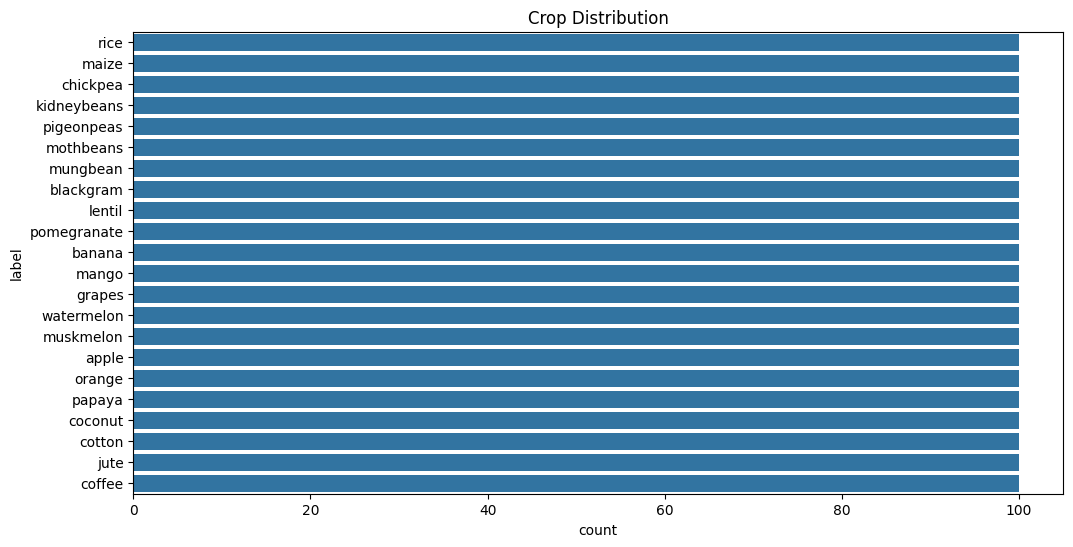

In [4]:
# Crop distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title("Crop Distribution")
plt.show()

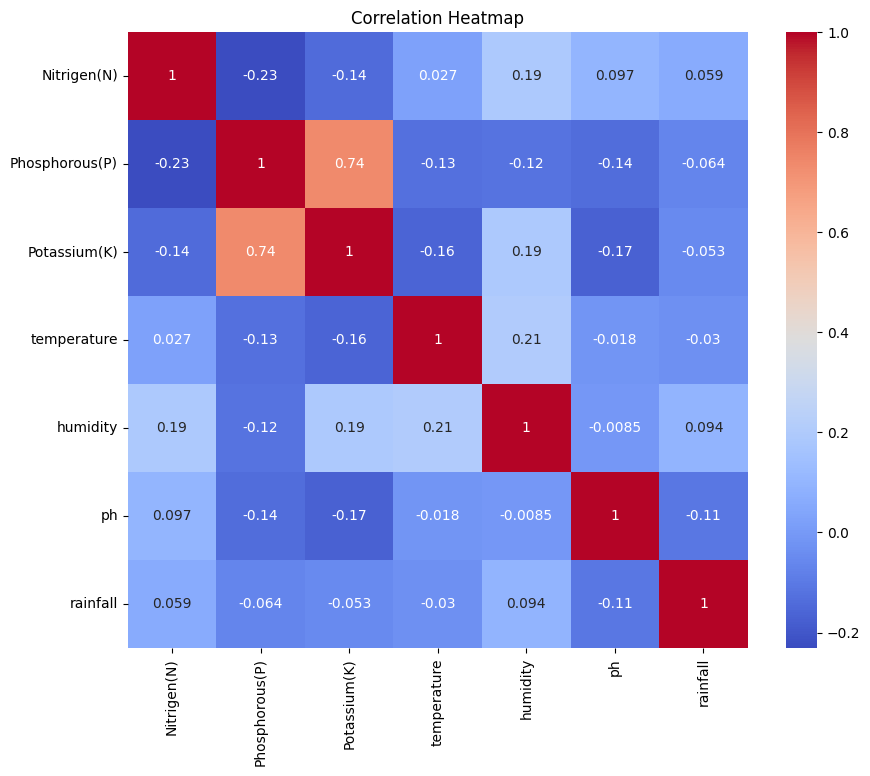

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns='label').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

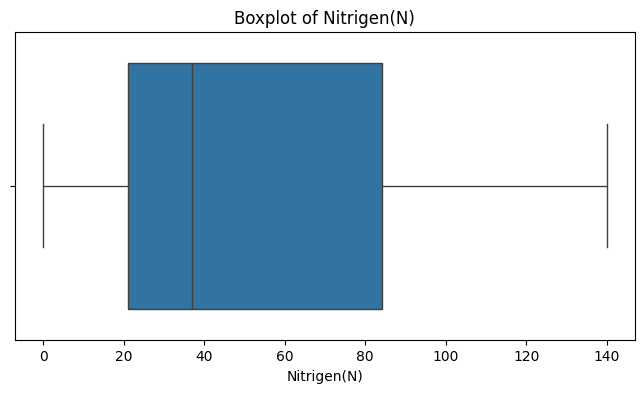

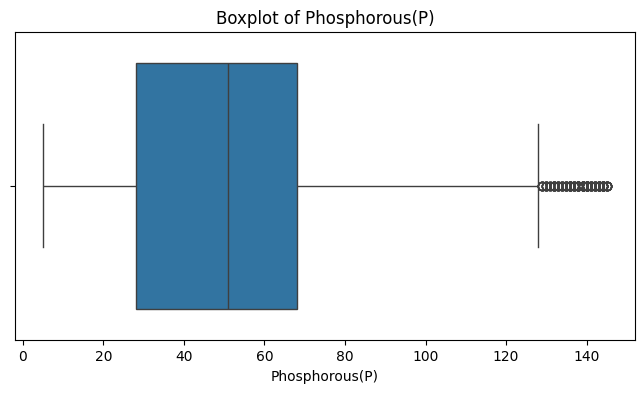

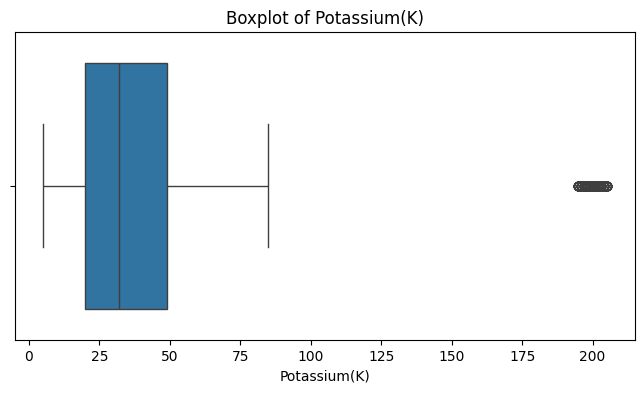

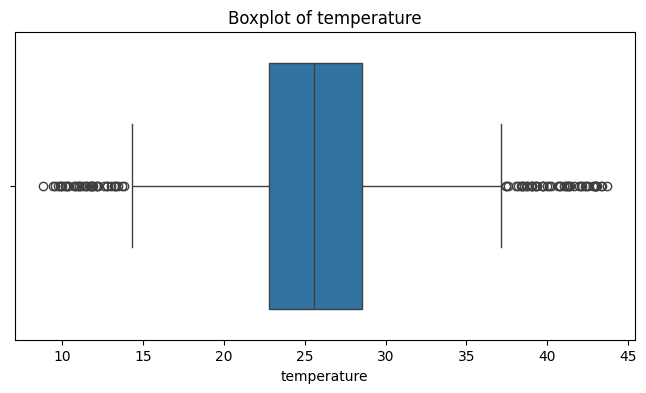

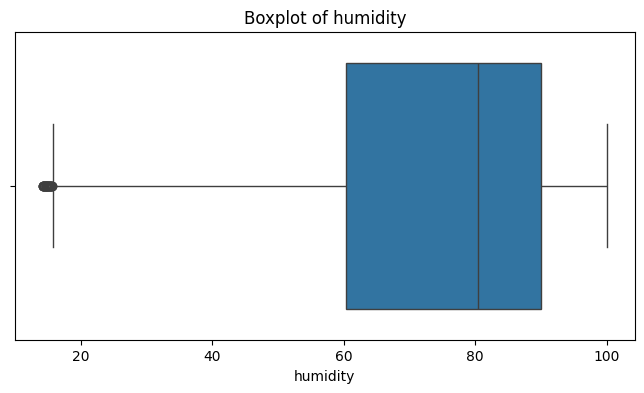

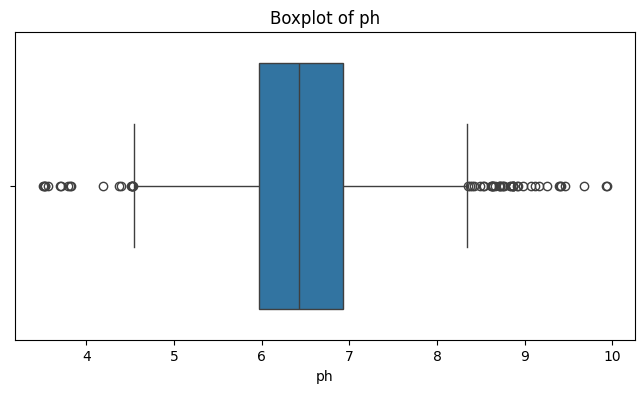

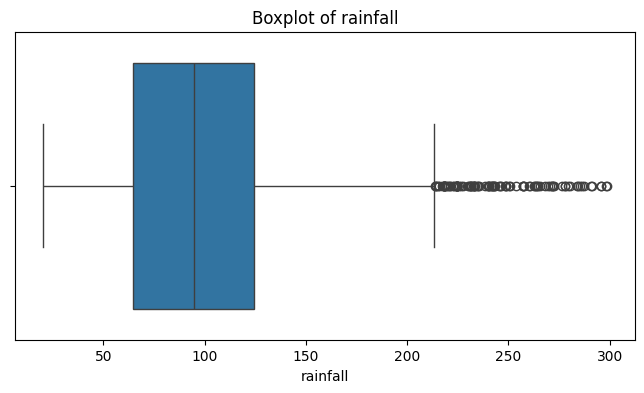

In [6]:
# Boxplots to detect outliers
features = ['Nitrigen(N)', 'Phosphorous(P)', 'Potassium(K)', 'temperature', 'humidity', 'ph', 'rainfall']
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## 🔍 KNOWLEDGE: Pattern and Trend Identification

In [7]:
# Average nutrient values per crop
df.groupby('label')[['Nitrigen(N)', 'Phosphorous(P)', 'Potassium(K)', 'temperature', 'humidity', 'ph', 'rainfall']].mean().sort_values(by='Nitrigen(N)', ascending=False)

,Nitrigen(N),Phosphorous(P),Potassium(K),temperature,humidity,ph,rainfall
label,,,,,,,
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
muskmelon,100.32,17.72,50.08,28.663066,92.342802,6.358805,24.689952
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
watermelon,99.42,17.00,50.22,25.591767,85.160375,6.495778,50.786219
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
papaya,49.88,59.05,50.04,33.723859,92.403388,6.741442,142.627839


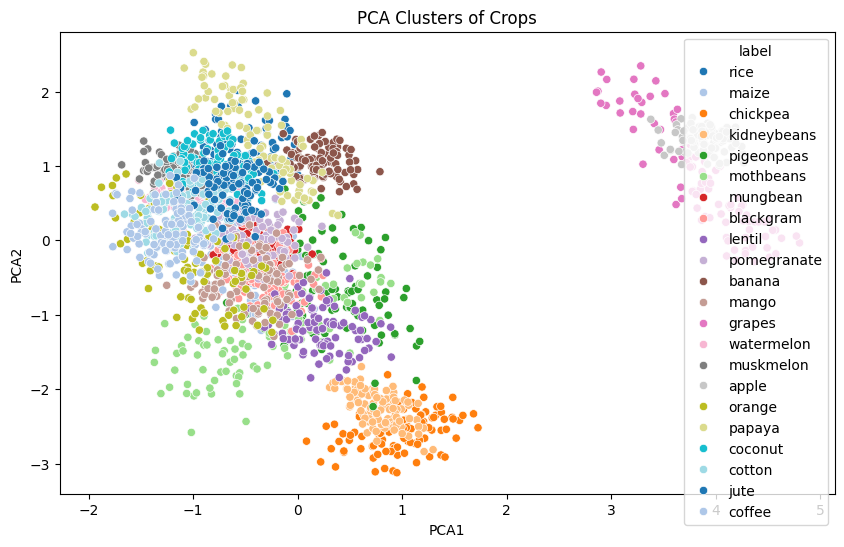

In [8]:
# PCA for pattern recognition
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='label'))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='label', palette='tab20')
plt.title("PCA Clusters of Crops")
plt.show()

## 🧠 WISDOM: Recommendation

In [9]:
# Sample profile
sample = {'Nitrigen(N)': 90, 'Phosphorous(P)': 42, 'Potassium(K)': 43, 'temperature': 25, 'humidity': 75, 'ph': 6.5, 'rainfall': 110}
sample_df = pd.DataFrame([sample])

# Recommend crop based on closest mean profile
mean_profiles = df.groupby('label')[sample_df.columns].mean()
distances = mean_profiles.apply(lambda row: np.linalg.norm(row - sample_df.iloc[0]), axis=1)
recommended_crop = distances.idxmin()
print("Recommended Crop:", recommended_crop)

Recommended Crop: maize


### 🧮 Multi-Criteria Decision Analysis (MCDA) using TOPSIS

To enhance decision-making, we applied the **TOPSIS** method for evaluating crops based on multiple criteria:

**Criteria Considered:**
- **Yield (kg/ha)** – Higher is better (weight: 0.4)
- **Water Requirement (mm)** – Lower is better (weight: 0.2)
- **Market Price (€/ton)** – Higher is better (weight: 0.2)
- **Soil Compatibility Score** – Higher is better (weight: 0.2)

This provides a holistic view of crop suitability considering agronomic, economic, and environmental factors.


In [10]:
import pandas as pd
import numpy as np

# Define crops and attributes
crops_data = {
    'Crop': ['Rice', 'Wheat', 'Maize'],
    'Yield (kg/ha)': [6200, 5000, 5400],
    'Water Requirement (mm)': [1200, 800, 700],
    'Market Price (€/ton)': [350, 400, 300],
    'Soil Compatibility Score': [8, 7, 9]
}

df_mcda = pd.DataFrame(crops_data)

# Define weights and criteria type
weights = np.array([0.4, 0.2, 0.2, 0.2])
beneficial = [True, False, True, True]

# Normalize and weight
X = df_mcda.iloc[:, 1:].values
X_norm = X / np.sqrt((X**2).sum(axis=0))
X_weighted = X_norm * weights

# Ideal & negative ideal
ideal = X_weighted.max(axis=0)
negative_ideal = X_weighted.min(axis=0)
for i in range(len(beneficial)):
    if not beneficial[i]:
        ideal[i], negative_ideal[i] = negative_ideal[i], ideal[i]

# Calculate TOPSIS scores
d_pos = np.linalg.norm(X_weighted - ideal, axis=1)
d_neg = np.linalg.norm(X_weighted - negative_ideal, axis=1)
topsis_score = d_neg / (d_pos + d_neg)

# Results
df_mcda['TOPSIS Score'] = topsis_score
df_mcda['Rank'] = df_mcda['TOPSIS Score'].rank(ascending=False).astype(int)
df_mcda.sort_values(by='TOPSIS Score', ascending=False)


,Crop,Yield (kg/ha),Water Requirement (mm),Market Price (€/ton),Soil Compatibility Score,TOPSIS Score,Rank
2,Maize,5400,700,300,9,0.602133,1
1,Wheat,5000,800,400,7,0.503398,2
0,Rice,6200,1200,350,8,0.451694,3


### Implications
Choosing the optimal crop improves agricultural productivity, reduces resource waste, and ensures economic sustainability for farmers.


## 🎯 BONUS: Action Using MCDA

In [11]:
# Weighted Scoring Model
weights = {'Nitrigen(N)': 0.2, 'Phosphorous(P)': 0.1, 'Potassium(K)': 0.1, 'temperature': 0.2, 'humidity': 0.1, 'ph': 0.1, 'rainfall': 0.2}
scores = mean_profiles.apply(lambda row: sum(weights[feat] * row[feat] for feat in weights), axis=1)
scores = scores.sort_values(ascending=False)
scores.head()

,0
label,
rice,85.566918
apple,74.454449
jute,72.952499
coffee,69.395370
banana,68.286957


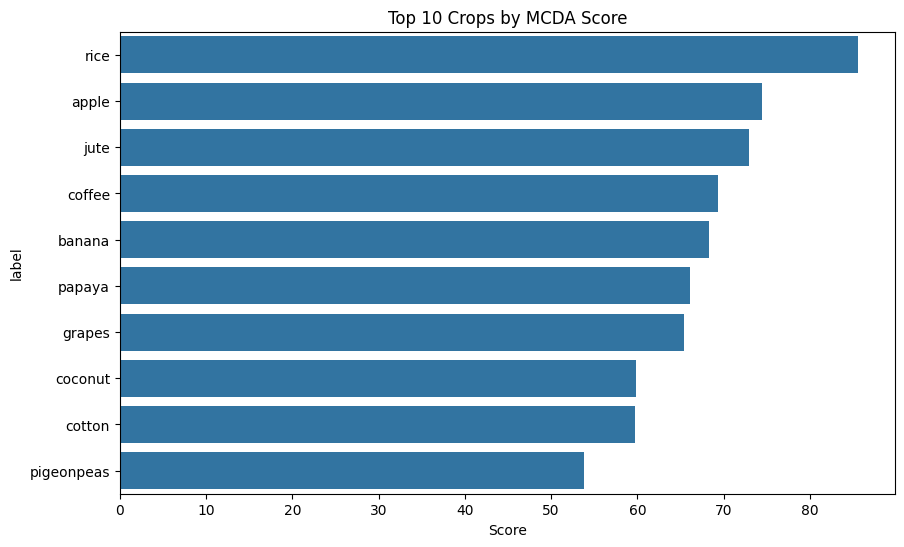

In [12]:
# Visualize top crops
plt.figure(figsize=(10, 6))
sns.barplot(x=scores.head(10).values, y=scores.head(10).index)
plt.title("Top 10 Crops by MCDA Score")
plt.xlabel("Score")
plt.show()

# 📢 Communication and Storytelling
The analysis follows a structured DIKW (Data, Information, Knowledge, Wisdom) framework, progressing logically from raw data to actionable insights.
Clear and concise interpretations are provided at each level, supported by descriptive statistics and effective visualizations.

The final recommendation is not only data-driven but also strengthened using a Multi-Criteria Decision Analysis (MCDA) technique, ensuring objectivity and practical relevance.
This narrative approach ensures stakeholders can easily follow the logic behind the conclusions and trust the proposed actions.

## 🎯 BONUS: MCDA – Multi-Criteria Decision Analysis

Final MCDA Scores:
label
rice        0.756926
maize       0.432490
mungbean    0.404471
chickpea    0.315864
apple       0.280514
dtype: float64


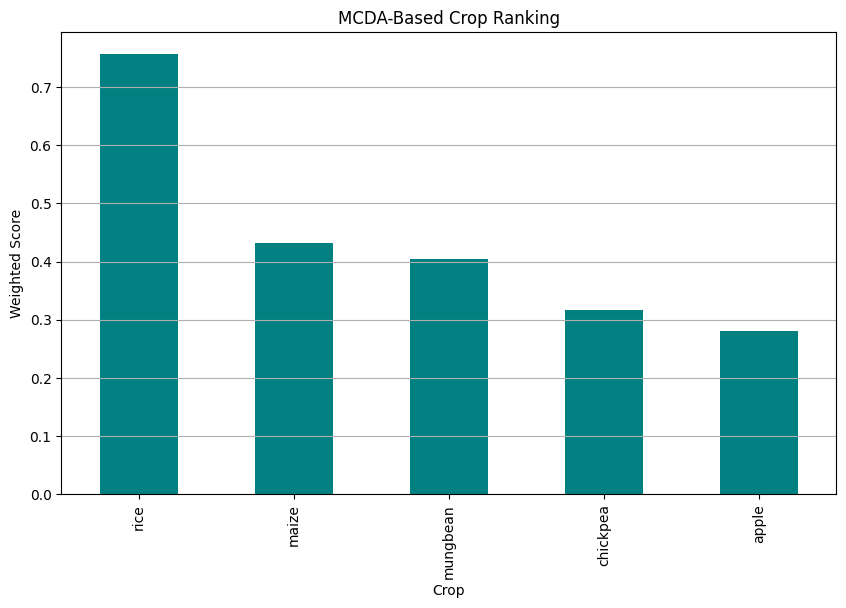

**Based on MCDA using rainfall, pH, N, temperature, and humidity as criteria, the most suitable crop is: `rice`.**

In [14]:
## 🧮 BONUS: Multi-Criteria Decision Analysis (MCDA)

# Step 1: Define alternatives (crops to evaluate)
crops_to_evaluate = ['rice', 'maize', 'mungbean', 'chickpea', 'apple']

# Step 2: Choose evaluation criteria
criteria = ['rainfall', 'ph', 'Nitrigen(N)', 'temperature', 'humidity']

# Step 3: Assign weights to each criterion (must sum to 1)
weights = {
    'rainfall': 0.3,
    'ph': 0.2,
    'Nitrigen(N)': 0.2,
    'temperature': 0.2,
    'humidity': 0.1
}

# Step 4: Create scoring table with mean values per crop
scoring_table = df[df['label'].isin(crops_to_evaluate)].groupby('label')[criteria].mean()

# Step 5: Normalize scores using Min-Max scaling
normalized_scores = (scoring_table - scoring_table.min()) / (scoring_table.max() - scoring_table.min())

# Step 6: Apply weights to normalized scores
final_scores = normalized_scores.dot(pd.Series(weights))
final_scores = final_scores.sort_values(ascending=False)

# Step 7: Display results
print("Final MCDA Scores:")
print(final_scores)

# Step 8: Visualize results
final_scores.plot(kind='bar', color='teal', title='MCDA-Based Crop Ranking', figsize=(10,6))
plt.ylabel('Weighted Score')
plt.xlabel('Crop')
plt.grid(axis='y')
plt.show()

# Interpretation
from IPython.display import Markdown
Markdown("**Based on MCDA using rainfall, pH, N, temperature, and humidity as criteria, the most suitable crop is: `{}`.**".format(final_scores.idxmax()))